In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()

In [14]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [16]:
iris_df['target'] = iris.target

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

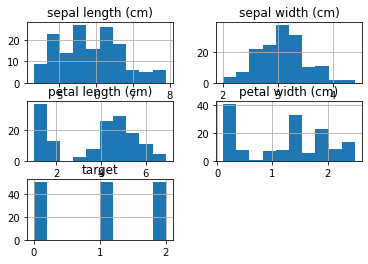

In [25]:
iris_df.hist()

In [26]:
import seaborn as sns

In [36]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [40]:
plt.style.use('seaborn-notebook')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

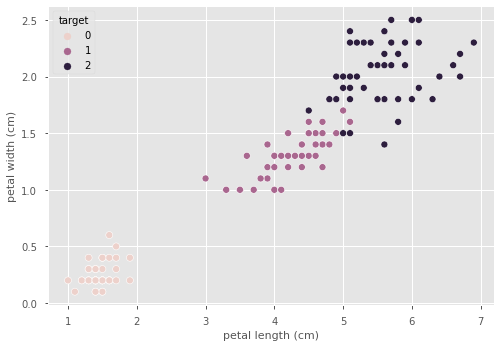

In [42]:
sns.scatterplot(data=iris_df ,x='petal length (cm)', y='petal width (cm)', hue='target')

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
model = KNeighborsClassifier(n_neighbors=5)

In [46]:
X = iris_df[['petal length (cm)','petal width (cm)']]
Y = iris_df['target']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

In [49]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [50]:
model.score(X_test, Y_test)

1.0

In [56]:
pred_proba= model.predict_proba(X_test)

In [59]:
pred_proba[:5,:]

array([[0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [65]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report

In [61]:
Y_pred = model.predict(X_test)

In [62]:
confusion_matrix(Y_test, Y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)

In [72]:
Y_test_reshaped = np.array((Y_test)).reshape(-1,1)
Y_pred_reshaped = np.array((Y_pred)).reshape(-1,1)

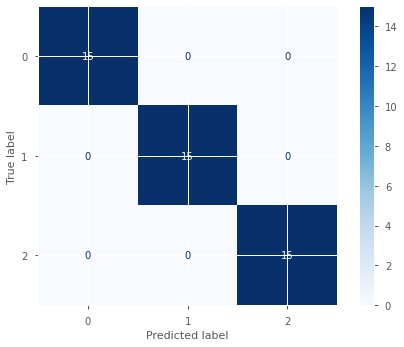

In [83]:
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues)

In [68]:
classification_report(Y_test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00        15\n           2       1.00      1.00      1.00        15\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

# K-fold cross validation 

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)

In [90]:
cross_val_score(knn, X, Y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [94]:
cross_val_score(knn, X, Y, cv=5).mean()

0.9666666666666668

# GridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'n_neighbors':np.arange(2,10)}
KNN = KNeighborsClassifier()
KNN_grid = GridSearchCV(KNN, param_grid, cv=5)

In [96]:
KNN_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [97]:
KNN_grid.score(X_test, Y_test)

1.0

In [98]:
KNN_grid.best_estimator_

KNeighborsClassifier()

In [99]:
KNN_grid.best_params_

{'n_neighbors': 5}

In [100]:
KNN_grid.best_score_

0.9523809523809523

In [104]:
KNN_grid.best_index_

3

In [118]:
KNN_grid.best_params_['n_neighbors']

5

In [105]:
knn_final = KNeighborsClassifier(n_neighbors=KNN_grid.best_params_['n_neighbors'])

In [106]:
knn_final.fit(X_train, Y_train)

KNeighborsClassifier()

In [108]:
knn_final.score(X_test, Y_test)

1.0

In [111]:
knn_final.n_neighbors

5

In [112]:
Y_pred= knn_final.predict(X_test)

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

In [117]:
confusion_matrix(Y_test, Y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]], dtype=int64)